In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


In [3]:
df = pd.read_csv("C:\\Users\\brohi\\Downloads\\beauty (1).csv")
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


In [4]:
df.value_counts().sum()

1260

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      1260 non-null   float64
 1   exper     1260 non-null   int64  
 2   union     1260 non-null   int64  
 3   goodhlth  1260 non-null   int64  
 4   black     1260 non-null   int64  
 5   female    1260 non-null   int64  
 6   married   1260 non-null   int64  
 7   service   1260 non-null   int64  
 8   educ      1260 non-null   int64  
 9   looks     1260 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 98.6 KB


In [6]:
df.describe()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000
mean,6.306690,18.206349,0.272222,0.933333,0.073810,0.346032,0.691270,0.273810,12.563492,3.185714
std,4.660639,11.963485,0.445280,0.249543,0.261564,0.475892,0.462153,0.446089,2.624489,0.684877
min,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000
25%,3.707500,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,3.000000
50%,5.300000,15.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,12.000000,3.000000
75%,7.695000,27.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,13.000000,4.000000
max,77.720000,48.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,5.000000


In [7]:
# Step 2: Drop 'wage' (assuming it's y column)
X = df.drop(columns=["wage"])

Removes the 'wage' column because it's not used as a target.

You're going to create your own labels using clustering.

In [8]:
# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Scales the features so that they have mean = 0 and standard deviation = 1.

This is essential for algorithms like KMeans and SVM to perform correctly.

In [9]:
# Step 4: Apply KMeans Clustering (create 3 groups)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

Applies KMeans clustering to group the data into 3 clusters.

clusters will contain the predicted cluster (0, 1, or 2) for each data point.

In [10]:
# Step 5: Use cluster labels as classification targets
y = clusters

The cluster labels from KMeans are now used as target labels (y) for classification.



In [11]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Splits the data into 80% training and 20% testing sets.

X is not scaled again here (you’re using the raw X, which could be a bug – more on that later).



In [12]:
# Step 7: Define Models and Hyperparameters
models_params = {
    "Logistic Regression": (LogisticRegression(max_iter=1000), {
        "C": [0.01, 0.1, 1, 10]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        "n_estimators": [50, 100],
        "max_depth": [None, 10, 20]
    }),
    "SVM": (SVC(), {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    }),
    "KNN": (KNeighborsClassifier(), {
        "n_neighbors": [3, 5, 7]
    }),
}


Defines four classifiers and their hyperparameter options for tuning:

Logistic Regression

Random Forest

Support Vector Machine (SVM)

K-Nearest Neighbors (KNN)



In [13]:
#  Step 8: Train models using GridSearchCV / classification_report 
results = {}
for name, (model, params) in models_params.items():
    print(f"\n--- {name} ---")
    grid = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_test)
    print("Best Params:", grid.best_params_)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    results[name] = {
        "best_params": grid.best_params_,
        "model": grid.best_estimator_
    }


--- Logistic Regression ---
Best Params: {'C': 10}
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        80
           2       1.00      1.00      1.00        72

    accuracy                           1.00       252
   macro avg       1.00      1.00      1.00       252
weighted avg       1.00      1.00      1.00       252


--- Random Forest ---
Best Params: {'max_depth': None, 'n_estimators': 50}
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.94      0.97        80
           2       0.97      1.00      0.99        72

    accuracy                           0.98       252
   macro avg       0.98      0.98      0.98       252
weighted avg       0.98      0.98      0.98       252


--- SVM ---
Best Params: {'C': 10, 'kernel': 'linear'}
Classi

For each model:

Performs GridSearchCV (cross-validation) to find the best hyperparameters.

Trains the model using training data.

Predicts on the test set.

--Prints:

Best parameters.

Classification report (precision, recall, f1-score, accuracy).

Stores the best model and its parameters in the results dictionary.

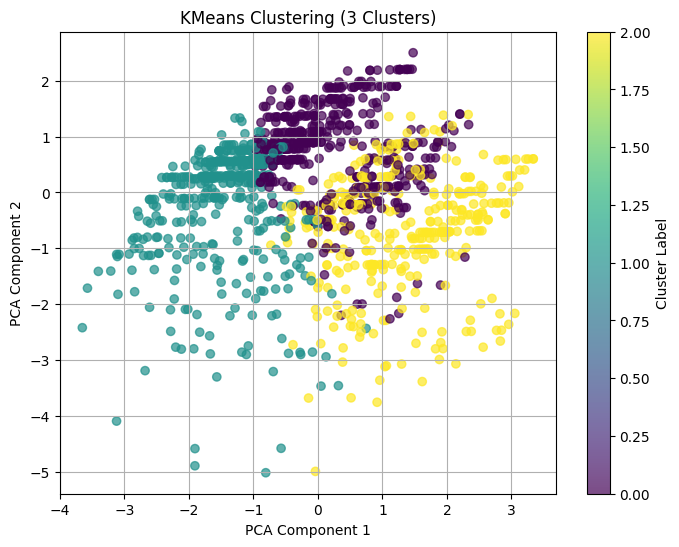

In [14]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce X to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)  # Use scaled data

# Clustering Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("KMeans Clustering (3 Clusters)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster Label")
plt.grid(True)
plt.show()


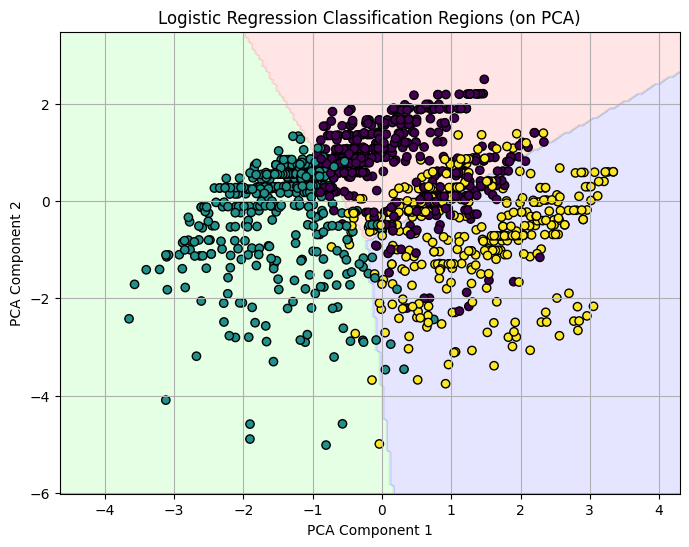

In [15]:
from matplotlib.colors import ListedColormap
import numpy as np

# Use PCA-transformed features
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a simple classifier on 2D PCA features
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_pca, y_train)

# Create a mesh grid for the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolor='k', cmap='viridis')
plt.title("Logistic Regression Classification Regions (on PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()
